# Investigation Into the Price to Play Video Games 

In [ ]:
import pandas as pd
import numpy as np

#ignore soft warnings
import warnings
warnings.filterwarnings('ignore')

# **Introduction**

I wanted to investigate the relationship that the passage of time has had on the price to play video games over the last years. There have been claims that it is easier to pick up and start playing games on the personal computer now than it was ever. But is this true? I hope to investigate the relationship the passage of time has had on the price to play video games.

# **Terminology**
By price to play video games, I mean the amount of money it would take to make a computer from scratch to play a specific game. Realistically this is a lot of woek, so I have limited the scope to only factor inthe following: 

*   The price of the game
*   The price of the Central Processing Unit
*   The price of the Graphics Card

While I know that this is far from everything to actually make a computer, I feel that these are the biggest costs in creating a computer and will base my research off of that theory.

# **Data Work**
Below I will get all my datasets I will be using for my project. I will discuss each dataset as I put it into code now discuss why I get specific columns and why I process them in the way I do. Here are the links for the datasets used:


*   https://www.kaggle.com/iliassekkaf/computerparts (allGPUs.csv)
*   https://www.kaggle.com/nikdavis/steam-store-games (steam.csv, steam_requirements_data.csv)
*   https://www.kaggle.com/fiftin/intel-and-amd-processors (intel_processors.csv)



Here I get the dataset for Graphics Cards (referenced as gpu henceforth) . To get the data for gpus, the original dataset contains 34 columns. A lot of the information given is irrelevant for this project. I will simply use the name to search for the gpu, if I cant find it by name I will try to get it by release date and memory. If that doesnt work I will simply get an average price for that year, excluding outliers used for heavy workload PCs. I will then use the price as a basis for my calculations. I will simply drop the rows with null values. I will do this because the majority of the entries are simply different manufacturers for a specific gpu. There is often not a price or date for that gpu so I simply drop it. I will also drop any gpus that have a price greater than $800, I do this because they are either package cards in SLI or they are gpus for professional image design or data mining use. To explain what SLI is, it is basically multiple cards, 2 or more, connected together to work as one. Games never require SLI cards so I will simply remove them to reduce clutter. I will also remove cards where their names are greater than 30 characters in length. I do this because these are often just 2nd parties or manufaturers that release a premium version of the card. These never show up in game recommended specs. I also change the memory column to display an integer rather than a string, this may be used in selecting which gpu to choose.

In [ ]:
def __getGPUDf__():

  def __dateYear__(string):
    #get year from date
    return string[-5:]

  def __removeDollar__(price):
    return float(price[1:])
  
  def __toInt__(memory):
    return int(memory[:-3])

  temp_df = pd.read_csv('All_GPUs.csv')
  df = temp_df[["Name","Memory","Release_Date","Release_Price"]]
  print("The number of NAN rows in the dataset to be dropped: " + str(df['Release_Price'].isnull().sum()))
  df = df.dropna()
  print("The number of NAN rows in the dataset after drop: " + str(df['Release_Price'].isnull().sum()))
  print("Number of rows in the dataset after drop: " + str(df.shape[0]))
  df['Release_Price'] = df['Release_Price'].apply(__removeDollar__)
  #drop cards greater than 800 in price
  df = df[df['Release_Price']<800]
  
  #drop cards with names greater than 30 characters long
  df = df[df['Name'].str.len()<30]

  df['Release_Date'] = df['Release_Date'].apply(__dateYear__)

  df['Memory'] = df['Memory'].apply(__toInt__)

  print("Number of unique, usable gpus in the dataset: " + str(df.shape[0]))
  
  return df

gpuDF = __getGPUDf__()
gpuDF

The number of NAN rows in the dataset to be dropped: 2850
The number of NAN rows in the dataset after drop: 0
Number of rows in the dataset after drop: 548
Number of unique, usable gpus in the dataset: 196


,Name,Memory,Release_Date,Release_Price
172,Radeon HD 4890,1024,2009,249.0
183,Radeon HD 4830 512MB,512,2008,130.0
186,Radeon HD 4770 512MB,512,2009,109.0
202,Radeon HD 4670 512MB,512,2008,67.0
933,Radeon RX Vega 64 Nano 8GB,8192,2017,499.0
...,...,...,...,...
3326,GeForce GT 740 v2,1024,2014,89.0
3329,GeForce GT 740,2048,2014,79.0
3357,GeForce GT 720 v2,1024,2014,59.0
3359,GeForce GT 730,2048,2014,89.0


Above are some sample gpus with workable data. As I mentioned earlier, hopefully if a requirement specifies a gpu, it will be present in the name column, otherwise I will try and get a price based on memory and release date. The column of most importance here is release_price. I will use it in my final calulations to get pc pricing 

Now I will get the central processing unit (cpu) dataset, similarly there is a lot of superfluous columns in this dataset. I will only need the name, launch date, base_frequency and price of the cpu. For the date I only need the year, so I will use an apply function no the dataset to extract the year. Similar to the gpus, there are server-grade and data mining specific cpus in the dataset, some exceeding 8000\$ in price. These will not realistically be used for game applications, therefore i have decided to drop any cpu with a price greater than 800\$, I feel that for a top-end pc this is a good max price.

In [ ]:
def __getCPUdf__():

  def __dateYear__(string):
    #get year from date
    return string[:4]

  temp_df = pd.read_csv('intel_processors.csv')
  temp_df = temp_df[['name','launch_date','base_frequency','price']]
  df = temp_df.dropna();

  df['launch_date'] = df['launch_date'].apply(__dateYear__)
  df = df[df['price']<800]

  return df

cpuDF = __getCPUdf__()
cpuDF

,name,launch_date,base_frequency,price
0,Intel Atom C2338,2013,1700.0,60.0
1,Intel Atom C2350,2013,1700.0,43.0
2,Intel Atom C2358,2013,1700.0,60.0
3,Intel Atom C2518,2013,1700.0,91.0
5,Intel Core i7-6700,2015,3400.0,303.0
...,...,...,...,...
1089,Intel Xeon D-1513N,2017,1600.0,192.0
1090,Intel Xeon D-2141I,2018,2200.0,555.0
1091,Intel Xeon D-2142IT,2018,1900.0,438.0
1092,Intel Xeon D-2145NT,2018,1900.0,502.0


Above is the format of the cpus i will use to get the final price to play a game.

Now I will get the steam requirements dataset. It will be later merged with the steam games dataset using the appid. Each appid is unique to a steam game and appears in both datasets. Again the dataset contains some columns that are superfluous, the minimum column contains the requirements in a string, It contains both the minimum requirements and recommended requirements. I will use recommended requirements where possible, however since these requirements are specified by the game company, it is not standardised. I hope to use regular expressions to make the data usable for my project. and if that is not possible I will try to use median prices to fill in any gaps using the release year of the game which I will get from the steam.csv dataset.

In [ ]:
def __getRequirementsDf__():
  
  
  temp_df = pd.read_csv('steam_requirements_data.csv')
  df = temp_df[['steam_appid','minimum','recommended']]
  # rename columns
  df = df.rename(columns={"steam_appid": "appid", "minimum": "minumum", "recommended": "recommended"})  
  return df

specDF = __getRequirementsDf__()
specDF.head(10)

,appid,minumum,recommended
0,10,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN
1,20,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN
2,30,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN
3,40,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN
4,50,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN
5,60,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN
6,70,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN
7,80,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN
8,130,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN
9,220,"OS: Windows 7, Vista, XP Processor: 1.7 Ghz Me...",NaN


As you can see above, the requirements came back nicely, if a recommended spec is not there, the column is filled with NaN and the minimum column is to be used. I am now ready to link the specs to the games using appid. 

I will now get the game dataset and merge it with the requirements dataset. Yet again, the dataset contains a lot of superfluous columns, I will get rid of most of them as they are not necessary for me to achieve my goal with this project. I will keep the appid, name, release_date, developer, genres and price of each game. Once I do some pre-processing, such as extracting the year from the date, I will merge the dataset with the requirements dataset.

In [ ]:
def __getSteamDF__():
  temp_df = pd.read_csv('steam.csv')

  def __dateYear__(string):
    #get year from date
    return string[:4]


  df = temp_df[['appid','name','release_date','developer','genres','price']]
  df['release_date'] = df['release_date'].apply(__dateYear__)
  result = pd.merge(specDF, df, on="appid")

  print("Number of games in the entire dataset: " + str(result.shape[0]))

  return result
steamdf = __getSteamDF__()
steamdf

Number of games in the entire dataset: 27062


,appid,minumum,recommended,name,release_date,developer,genres,price
0,10,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN,Counter-Strike,2000,Valve,Action,7.19
1,20,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN,Team Fortress Classic,1999,Valve,Action,3.99
2,30,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN,Day of Defeat,2003,Valve,Action,3.99
3,40,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN,Deathmatch Classic,2001,Valve,Action,3.99
4,50,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN,Half-Life: Opposing Force,1999,Gearbox Software,Action,3.99
...,...,...,...,...,...,...,...,...
27057,1065230,OS: Windows 7 Processor: Inter Core i7 Memory:...,NaN,Room of Pandora,2019,SHEN JIAWEI,Adventure;Casual;Indie,2.09
27058,1065570,"OS: Windows XP, Vista, 7, 8, 10 Processor: Int...",NaN,Cyber Gun,2019,Semyon Maximov,Action;Adventure;Indie,1.69
27059,1065650,"OS: Windows 7, Windows 8, Windows 10 (32/64bit...",NaN,Super Star Blast,2019,EntwicklerX,Action;Casual;Indie,3.99
27060,1066700,OS: Windows XP or later Processor: 1.5 GHz Mem...,OS: Windows 7 or later Processor: 1.5 GHz Memo...,New Yankee 7: Deer Hunters,2019,Yustas Game Studio,Adventure;Casual;Indie,5.19


Above we can see the two datasets being merged on appid. Now we are ready to run these values through the main function to get the price_to_play for each game.

In [ ]:
#def __getCpuFromString__(spec):
#  import re
#
#  if "Processor:" in spec:
#    #print(int(cpuDF['name'].str.len().max()))
#    #the above line gets the max length (26) of a cpu name in the dataset. Hopefully a match will be made using that, +1 is added to account for ' ' after ':'
#    cpu_pattern = re.compile("(?<=Processor:).{2,27}")
#    return spec.findall(cpu_pattern)
#  else:
#    return np.NAN

#def __getGpuFromString__(spec):
#  import re
#  
#  if "Graphics:" in spec:
#    #print(int(gpuDF['Name'].str.len().max()))
#    #the above line gets the max length (29) of a gpu name in the dataset. Hopefully a match will be made using that, +1 is added to account for ' ' after ':'
#    gpu_pattern = re.compile("(?<=Graphics:).{2,30}")
#    return spec.find(gpu_pattern)
#  else:
#    return np.NAN

#instead of doing the above, I felt that combining the two would be more efficient seeing as they did a similar thing
def __extractFromString__(query,spec):
  #this method takes in two parameters, query (whether it is a CPU or a GPU), and string, the recommended or minimum spec string from the dataset.

  # re allows use of regular expressions
  import re

  string_pattern = "(?<=" + query + ":)"
  for i in range(7):

    # string_pattern variable will create a regEx expression. it will use a positive lookbehind to read strings from in front of the matched string (Processor: or Graphics:)
    # the loop will iterate through 7 times, each iteration will add another word (" \w+") to match. 
    string_pattern = string_pattern + " \w+"
    pattern = re.compile(string_pattern)
    match = pattern.search(spec).group(0).strip() #.strip() removes whitespace before and after sentence or word

    # the following lines of code will see if match brought back anything, otherwise return "None"
    if match:
      # used for debugging purposes print(match) is commented out now
      #print(match)

      #this checks if the matched CPU or GPU exists in one of the datasets. If it does, it returns the name of that cpu, ending the loop
      if __ExistsInHardwareDF__(query,match):
        return match

  # a "None" will tell me to use median or average price
  return "None"

def __ExistsInHardwareDF__(hardwareType,name):

  #this method checks if the specifed value exists in the database and returns a boolean

  if (hardwareType=="Processor"):
    #do cpuDF
    if name in set(cpuDF['name']):
      print("found")
      return True
    print("not found")
    return False
  else:
    #do gpuDF
    if name in set(gpuDF['Name']):
      return True
    return False


In [ ]:
__extractFromString__("Processor","OS: Windows XP SP2, Vista SP2, 7 Processor: Intel Atom C2338 or AMD Phenom II X2 555 or better Memory: 2GB RAM Graphics: ATI Radeon HD 3850 or NVIDIA GeForce 8800 or better DirectX®: DirectX 9.0c Hard Drive: 3GB free Sound: DirectX 9.0c-compatible Peripherals: Xbox 360 Controller for Windows, Logitech Dual Action, Logitech Rumblepad 2 Other Requirements: Internet connection required")

not found
not found
found


'Intel Atom C2338'

This shows that the function works. Hopefully, the comments are extensive enough to tell how the function works but I will discuss it now as well. The easy function to explain is \_\_ExistsInHardwareDF\_\_ This takes in the type of hardware, either Processor or Graphics Card, and the name generated from the regular expression. If found in the datasets it returns true otherwise it returns false.

Next, to explain \_\_extractFromString\_\_. What I do here, I create a regular expression string and compile it to search the pc spec. For every iteration that returns False from \_\_ExistsInHardwareDF\_\_ the regular expression includes an extra word from the spec. This happens until either a piece of hardware is found or it runs through all the words and finds nothing, in which case "None" is returned.

Here is where we run into an issue. Up until this point, I thought that extracting cpu and gpu from the recommended specs would be as simple as shown above, I found however, that most developers are very wishy-washy with their recommended hardware for a game, some just specifying clock speeds e.g. 3.0 Ghz, and some specifying families such as 'intel core i-3 family 5th gen or better' .

Unfortunately, because of time constraints I am unable to fully work around those issues. To keep this project going, I will use mean prices for the hardware to generate the values I will use for comparison. Technically this wont affect the final result that much, seeing as I'm hoping to find that the price to play games has gone up over the years. One unfortunate side effect is that I will not be able to generate any interesting data regarding what genres of games require more expensive computers as I was hoping to do as a side-objective of the project. I will still try to generate some interesting statistics on the popularity of genres and their player bases.

# **Data Modelling**

In [ ]:
mean_GPU_prices = gpuDF[["Release_Date","Release_Price"]].groupby("Release_Date").mean()
mean_GPU_prices

,Release_Price
Release_Date,
013\t,649.000000
2007,349.000000
2008,234.300000
2009,305.000000
2010,311.583333
2011,211.375000
2012,254.055556
2013,210.444444
2014,210.640000


As you can see, there are some weird anomalies in the above dataset, I will remove them now as they are very unnecessary. Another observation I made is that these gpus only go to the year 2017, I will make do with this for now.

In [ ]:
mean_GPU_prices = mean_GPU_prices.drop(mean_GPU_prices.index[0])
mean_GPU_prices = mean_GPU_prices.drop(mean_GPU_prices.index[-1])
mean_GPU_prices

,Release_Price
Release_Date,
2007,349.000000
2008,234.300000
2009,305.000000
2010,311.583333
2011,211.375000
2012,254.055556
2013,210.444444
2014,210.640000
2015,333.476190


The above are the mean gpu prices from 2007-2017.

I will now get the mean prices for the cpu dataset

In [ ]:
mean_CPU_prices = cpuDF[["launch_date","price"]].groupby("launch_date").mean()
mean_CPU_prices

,price
launch_date,
2010,85.000000
2011,594.000000
2012,305.000000
2013,205.509434
2014,216.775000
2015,284.775862
2016,268.230769
2017,285.885714
2018,286.412698


The above are the mean prices for the cpus in the dataset from 2010 to 2021. There seems to be an anomaly at the year 2010 but I will leave it be for now

I will now graph the mean prices against the years

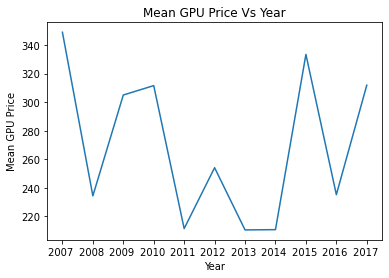

In [ ]:
import matplotlib.pyplot as plt

plt.plot(mean_GPU_prices)
plt.title('Mean GPU Price Vs Year')
plt.xlabel('Year')
plt.ylabel('Mean GPU Price')
plt.show()

We see above, the gpu prices have had their dips and their spikes, however they hover around the 280-300 price

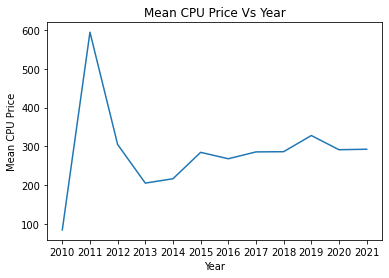

In [ ]:
plt.plot(mean_CPU_prices)
plt.title('Mean CPU Price Vs Year')
plt.xlabel('Year')
plt.ylabel('Mean CPU Price')
plt.show()

Here we definitely see some anomalies in the first 2 years, 2010 and 2011. However as we move further along from 2012 there seems to be a very slight increase in the mean price as we go along

In [ ]:
#data = {'Genre':['Action', 'Adventure', 'RPG', 'Simulation', 'Strategy', 'Indie'],
#        'Tally':[0, 0, 0, 0, 0, 0]}
#tallies = pd.DataFrame(data)

#def __tallyGenres__(gameGenre):
#  genres = ['Action', 'Adventure', 'RPG', 'Simulation', 'Strategy', 'Indie']
#  for genre in genres:
#    if genre in gameGenre:
#      tallies['Tally'][tallies['Genre']==genre] = tallies['Tally'][tallies['Genre']==genre] + 1

#steamdf['genres'].apply(__tallyGenres__)

data = {'Genre':['Action', 'Adventure', 'RPG', 'Simulation', 'Strategy', 'Indie'],
        'Tally':[11898, 10027, 4309, 5193, 5244, 19413]}
tallies = pd.DataFrame(data)
tallies = tallies.set_index('Genre')
tallies

,Tally
Genre,
Action,11898
Adventure,10027
RPG,4309
Simulation,5193
Strategy,5244
Indie,19413


The above code tallies up all the instances of genres in the SteamDF dataset.for your convenience the code has been commented out and the final results have been hard coded in as the execution takes about 3 and a half minutes. Feel free to uncomment to see that it works. I will now explain how it works. I instantiate a JSON with an array of the big 6 genres and Tally all set to 0.
I then define a function to use in steamdf.apply that will tally the amount of times a specific genre is present. Please note that a game can be a combination of genres e.g. Indie, Action Adventure game. This is why the tally more than double the size of the dataset. I will now present this data graphically

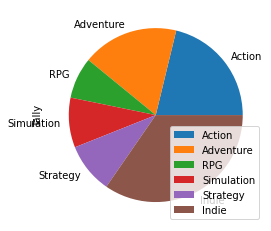

In [ ]:
tallies.plot.pie(y='Tally')

This shows a rough distribution of game's genres across the platform, it is not perfect because a game can have multiple genres. However, I feel it gives us a rough idea of the popularity of the different genres. Please note that by popular I mean for developers to develop rather than audiences to play.

A table of these results that is more meaningful would look as follows:

In [ ]:
def __asPercentage__(number):
  return number/steamdf.shape[0]*100
tallies['as % of all games'] = tallies['Tally'].apply(__asPercentage__)
tallies

,Tally,as % of all games
Genre,,
Action,11898,43.965708
Adventure,10027,37.051955
RPG,4309,15.922696
Simulation,5193,19.189269
Strategy,5244,19.377725
Indie,19413,71.735275


From this table we see that Indie games make up around 72\% of the total games out on steam, Action games take up around 44\%, Adventure games 37\%, Simulation and Strategy both about 19%, and RPGs around 16%. I feel this is more meaningful to show how popular each genre is to develop.

I will now calculate the price to play for a game according to mean prices and draw on conclusions from the results. I will then try to predict future prices to play.

In [ ]:
def __calcPriceToPlay__():

  def __getGPUPrice__(year):
    year = int(year)
    index = 2017 - year

    priceArray = mean_GPU_prices['Release_Price'].to_numpy()

    if(year>2017):
      return priceArray[-1]
    elif (year<2007):
      return priceArray[0]
    else:
      return priceArray[index]
      

  def __getCPUPrice__(year):
    year = int(year)
    index = 2021 - year

    priceArray = mean_CPU_prices['price'].to_numpy()

    if(year>2021):
      return priceArray[-1]
    elif (year<2010):
      return priceArray[0]
    else:
      return priceArray[index]
      

  temp_df = pd.DataFrame()

  temp_df['price'] = steamdf['price']
  temp_df['gpuPrice'] = steamdf['release_date'].apply(__getGPUPrice__)
  temp_df['cpuPrice'] = steamdf['release_date'].apply(__getCPUPrice__)

  steamdf['price_to_play'] = temp_df['price'] + temp_df['gpuPrice'] + temp_df['cpuPrice']
  print(temp_df.head(20))
__calcPriceToPlay__()
steamdf

    price    gpuPrice    cpuPrice
0    7.19  349.000000   85.000000
1    3.99  349.000000   85.000000
2    3.99  349.000000   85.000000
3    3.99  349.000000   85.000000
4    3.99  349.000000   85.000000
5    3.99  349.000000   85.000000
6    7.19  349.000000   85.000000
7    7.19  349.000000   85.000000
8    3.99  349.000000   85.000000
9    7.19  349.000000   85.000000
10   7.19  349.000000   85.000000
11   0.00  349.000000   85.000000
12   7.19  210.640000  292.766667
13   3.99  349.000000   85.000000
14   0.00  349.000000   85.000000
15   0.00  349.000000   85.000000
16   5.79  349.000000   85.000000
17   7.19  311.881765   85.000000
18   5.79  311.881765   85.000000
19   0.00  311.881765   85.000000


,appid,minumum,recommended,name,release_date,developer,genres,price,price_to_play
0,10,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN,Counter-Strike,2000,Valve,Action,7.19,441.190000
1,20,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN,Team Fortress Classic,1999,Valve,Action,3.99,437.990000
2,30,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN,Day of Defeat,2003,Valve,Action,3.99,437.990000
3,40,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN,Deathmatch Classic,2001,Valve,Action,3.99,437.990000
4,50,"500 mhz processor, 96mb ram, 16mb video card, ...",NaN,Half-Life: Opposing Force,1999,Gearbox Software,Action,3.99,437.990000
...,...,...,...,...,...,...,...,...,...
27057,1065230,OS: Windows 7 Processor: Inter Core i7 Memory:...,NaN,Room of Pandora,2019,SHEN JIAWEI,Adventure;Casual;Indie,2.09,618.971765
27058,1065570,"OS: Windows XP, Vista, 7, 8, 10 Processor: Int...",NaN,Cyber Gun,2019,Semyon Maximov,Action;Adventure;Indie,1.69,618.571765
27059,1065650,"OS: Windows 7, Windows 8, Windows 10 (32/64bit...",NaN,Super Star Blast,2019,EntwicklerX,Action;Casual;Indie,3.99,620.871765
27060,1066700,OS: Windows XP or later Processor: 1.5 GHz Mem...,OS: Windows 7 or later Processor: 1.5 GHz Memo...,New Yankee 7: Deer Hunters,2019,Yustas Game Studio,Adventure;Casual;Indie,5.19,622.071765


As you can see above, the calculation function is working properly, the abundance of duplicate values is due to my hardware datasets being limited. However, the data for years 2011-2016 should be pretty good, seeing as I had good data for those years in both CPU and GPU datasets. I will now do a simple diagram of mean price_to_play games over the years and discuss my findings.

# **Results**

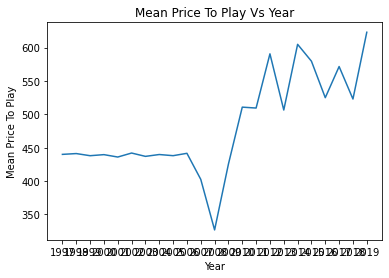

In [ ]:
def __visualizePriceToPlay__():
  required_columns = steamdf[['release_date','price_to_play']]
  required_columns = required_columns.groupby("release_date").mean()
  plt.plot(required_columns)
  plt.title('Mean Price To Play Vs Year')
  plt.xlabel('Year')
  plt.ylabel('Mean Price To Play')
  plt.show()
  required_columns = steamdf[['release_date','price_to_play']]
  return required_columns
  
df = __visualizePriceToPlay__()

I would just ignore the massive dip that happens in 2010, it is likely due to my inadequate cpu data on that year, seeing as the mean price for cpus that year was 85\$ according to my data. Otherwise, I believe that my hypothesis is correct, I can see a clear pattern forming on price to play games from the graph, from 2011, we can see a rise from aroun 440\$ to 500\$, then there is some spikes and dips in pricing ranging from around 570\$ to 500\$ until we finally arrive in 2019 when the mean price to play is around 600\$.

Using this data, I will try and predict the next couple of years price to play games using a regression algorithm. I believe the ElasticNet or the Lasso algorithm would be a good for this. I also believe that I should disregard the large dip in 2010 and 2009, I might use the values from before 2009, or substitute the values from then into these outliers

# **Conclusion**



In conclusion, I believe I have done what I set out to do. I have found a positive correlation between mean price to play for a video game and time. I.e. It is getting more expensive to start playing video games on a personal computer. While I initially had an inkling this was the case, it is a good feeling to have statistical proof that even though only slightly, the price to play is increasing year by year.

If I was to continue this project in the future I would definitely work on my algorithm to extract hardware from the spec sheet for the games. It was a shame to have to dumb down the project in order to finish it on time. I feel that the datasets I had picked out got very under-utilised because of that. It is a shame I was not able to split the price to play per genre because of this as well. I feel that the information I could have gotten got curbed by the fact I had to make such a drastic work around.

While what I say above is true, I dont think that has affected the final result. I would have had to calculate the mean price to see the relationship anyways, It is just a lot of interesting findings have gotten buried because of it.